In [3]:
from __future__ import print_function

from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, rdmolops

In [4]:
smiles = {
    "aminocyclohexane": "C1CCCCC1N",
    "aniline": "c1ccccc1N",
    "benzene": "c1ccccc1",
    "diaminocyclohexane": "C1CC(N)CCC1N",
    "aminocyclohexane2": "C1CC(N)CCC1",
}

mols = {k: Chem.MolFromSmiles(v) for k, v in smiles.items()}

In [5]:
%matplotlib inline

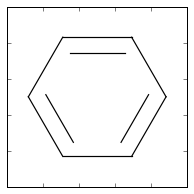

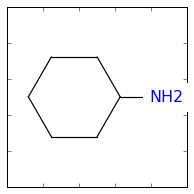

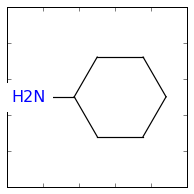

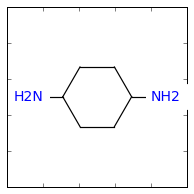

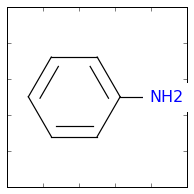

In [6]:
for name, mol in mols.items():
    fig = Draw.MolToMPL(mol, size=(100, 100))

In [14]:
import pandas as pd


print("The molecule in row is substructure of the molecule in column - True or False?")
substructure = pd.DataFrame({k: [v.HasSubstructMatch(other) for other in mols.values()] 
                             for k, v in mols.items()}, index=mols.keys())
substructure

The molecule in row is substructure of the molecule in column - True or False?


,aminocyclohexane,aminocyclohexane2,aniline,benzene,diaminocyclohexane
benzene,False,False,True,True,False
aminocyclohexane,True,True,False,False,True
aminocyclohexane2,True,True,False,False,True
diaminocyclohexane,False,False,False,False,True
aniline,False,False,True,False,False


In [8]:
fingerprints = {k: rdmolops.RDKFingerprint(v, fpSize=12) for k, v in mols.items()}

In [9]:
fingerprints["benzene"].ToBitString()

'011111111010'

In [10]:
print("The fingerprint in row contains all bits of the fingerprint in column - True or False?")
pd.DataFrame({k: [DataStructs.AllProbeBitsMatch(other, v) for other in fingerprints.values()] 
              for k, v in fingerprints.items()}, index=fingerprints.keys())

The fingerprint in row contains all bits of the fingerprint in column - True or False?


,aminocyclohexane,aminocyclohexane2,aniline,benzene,diaminocyclohexane
benzene,True,True,True,True,True
aminocyclohexane,True,True,False,False,True
aminocyclohexane2,True,True,False,False,True
diaminocyclohexane,True,True,False,False,True
aniline,True,True,True,False,True
